In [1]:
#Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

Data Preparation

    1. Data loading

In [3]:
#Importing .csv file
data = pd.read_csv("L:/MLseries/dataset/dataset/assignment/DataScienceInternship.csv")
data.head() 

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
data.shape

(46608, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [6]:
data.describe()

,Unnamed: 0
count,46608.00000
mean,23303.50000
std,13454.71501
min,0.00000
25%,11651.75000
50%,23303.50000
75%,34955.25000
max,46607.00000


2. Data preprocess


In [7]:
#checking duplicates in whole rows
duplicate_rows = sum(data.duplicated())
duplicate_rows

0

In [8]:
#checking duplicates in "Agent_id"
sum(data.duplicated(subset = 'Agent_id')) == 0

False

In [9]:
# duplicates exist in "Agent_id"

In [10]:
#checking duplicates in "Agent_id" and "lead_id"
sum(data.duplicated(subset = ['Agent_id',"lead_id"]))==0

False

In [11]:
# duplicates exist in "Agent_id" and "lead_id"

In [12]:
data.duplicated(subset = ['Agent_id',"lead_id"])

0        False
1        False
2        False
3        False
4        False
         ...  
46603    False
46604    False
46605    False
46606    False
46607    False
Length: 46608, dtype: bool

In [13]:
# removing duplicates exists in "Agent_id" and "lead_id"
data=data.drop_duplicates(subset=['Agent_id','lead_id'])

# size of dataframe after removing duplicates
data.shape

(45947, 16)

In [14]:
sum(data.duplicated(subset = ['Agent_id',"lead_id"]))==0

True

In [15]:

# Converting '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' values to NaN.
data = data.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.NaN)
data

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,NaN,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,NaN,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b

In [16]:
#finding number of missing values in each column

data.isna().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3351
budget             3598
lease              2291
movein            13303
source             5810
source_city        8676
source_country     8473
utm_source           60
utm_medium         3138
des_city           2469
des_country        2469
room_type         23076
lead_id               0
dtype: int64

In [17]:
# percentage of missing values in each column 
round(100*(data.isnull().sum()/len(data.index)), 2)

Unnamed: 0         0.00
Agent_id           0.00
status             0.00
lost_reason        7.29
budget             7.83
lease              4.99
movein            28.95
source            12.65
source_city       18.88
source_country    18.44
utm_source         0.13
utm_medium         6.83
des_city           5.37
des_country        5.37
room_type         50.22
lead_id            0.00
dtype: float64

In [18]:
#here dropping "Unnamed: 0" column
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,NaN,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,NaN,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca88

In [19]:
#identify status other than LOST and WON
status_types= data["status"].value_counts()
print(status_types)

LOST           42596
WON             3061
OPPORTUNITY      253
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64


In [20]:
#dropping all rows with status other than LOST and WON
data.drop(data[data['status'] == 'OPPORTUNITY'].index, inplace = True)
data.drop(data[data['status'] == 'CONTACTED'].index, inplace = True)
data.drop(data[data['status'] == 'PROCESSING'].index, inplace = True)
data.drop(data[data['status'] == 'IMPORTANT'].index, inplace = True)


In [21]:
# size after removing all rows with status other than LOST and WON
data.shape

(45657, 15)

In [22]:

round(100*(data.isnull().sum()/len(data.index)), 2)

Agent_id           0.00
status             0.00
lost_reason        6.70
budget             7.87
lease              5.01
movein            29.08
source            12.67
source_city       18.96
source_country    18.52
utm_source         0.13
utm_medium         6.87
des_city           5.39
des_country        5.39
room_type         50.42
lead_id            0.00
dtype: float64

In [23]:
status_types= data["status"].value_counts()
print(status_types)

LOST    42596
WON      3061
Name: status, dtype: int64


# Handelling missing values


1. room_type         50.42


In [24]:
data["room_type"].value_counts()

Ensuite         12273
Studio           6260
Entire Place     4100
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

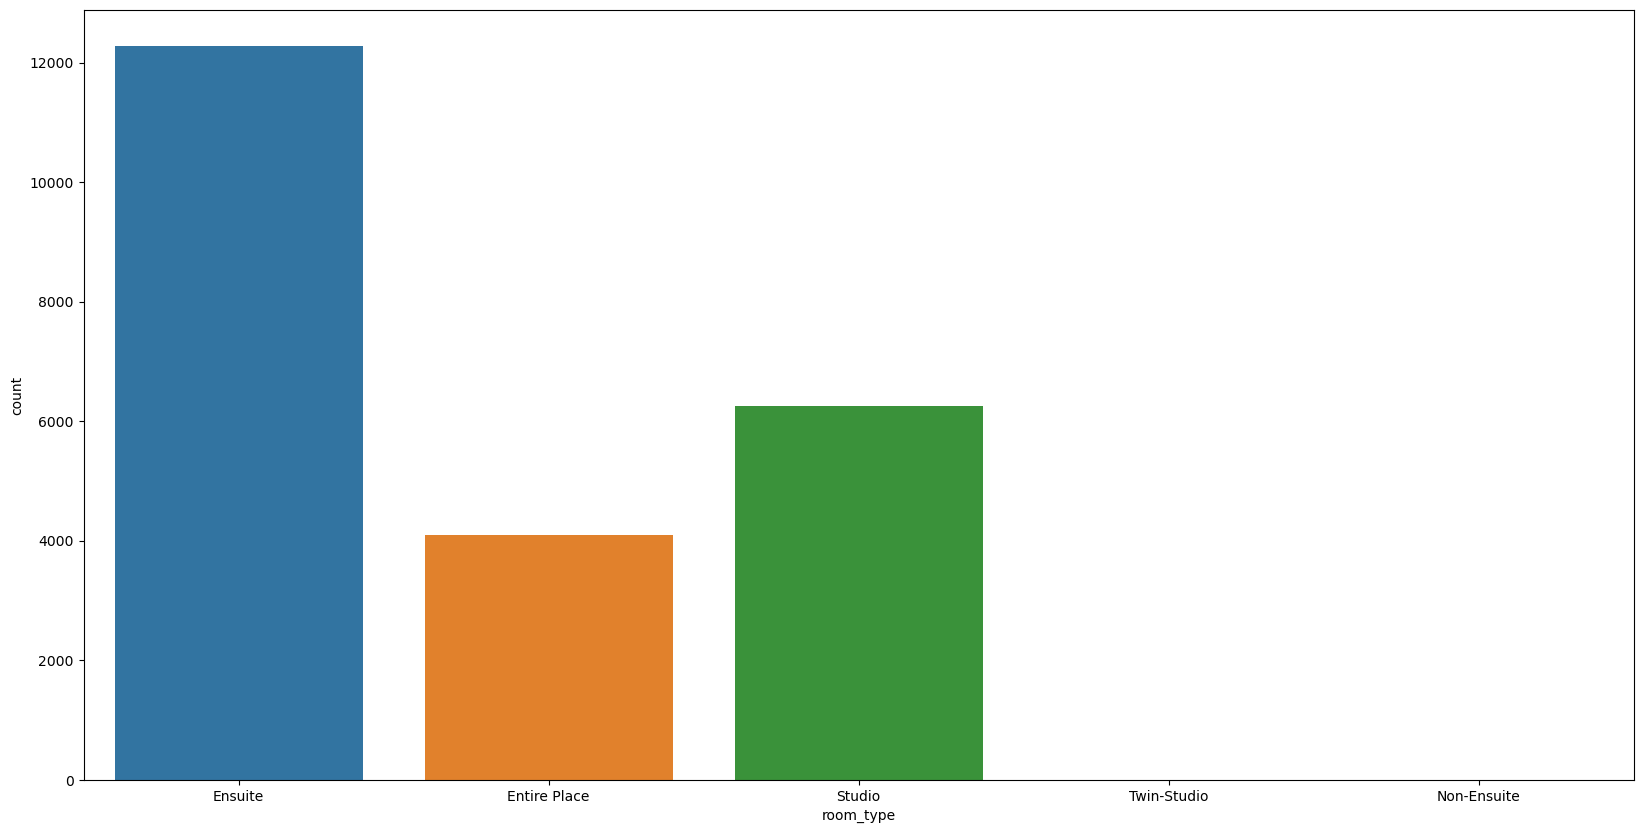

In [25]:
# visualizing "room_type" in dataframe

fig, ax = plt.subplots(figsize=(20, 10))
 

sns.countplot(data['room_type'],ax=ax)
plt.show()

In [26]:
# replacing missing values of "room_type" with "others", a new type since missing value is 50.42% assigning to mode will change the data behaviour therefor assigned to a new value called others

data['room_type'] = data['room_type'].replace(np.NaN, 'Others')
print(data["room_type"])

0         Others
1         Others
2        Ensuite
3         Others
4         Others
          ...   
46603     Studio
46604     Studio
46605     Studio
46606     Others
46607     Studio
Name: room_type, Length: 45657, dtype: object


In [27]:
data["room_type"].value_counts()

Others          23021
Ensuite         12273
Studio           6260
Entire Place     4100
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

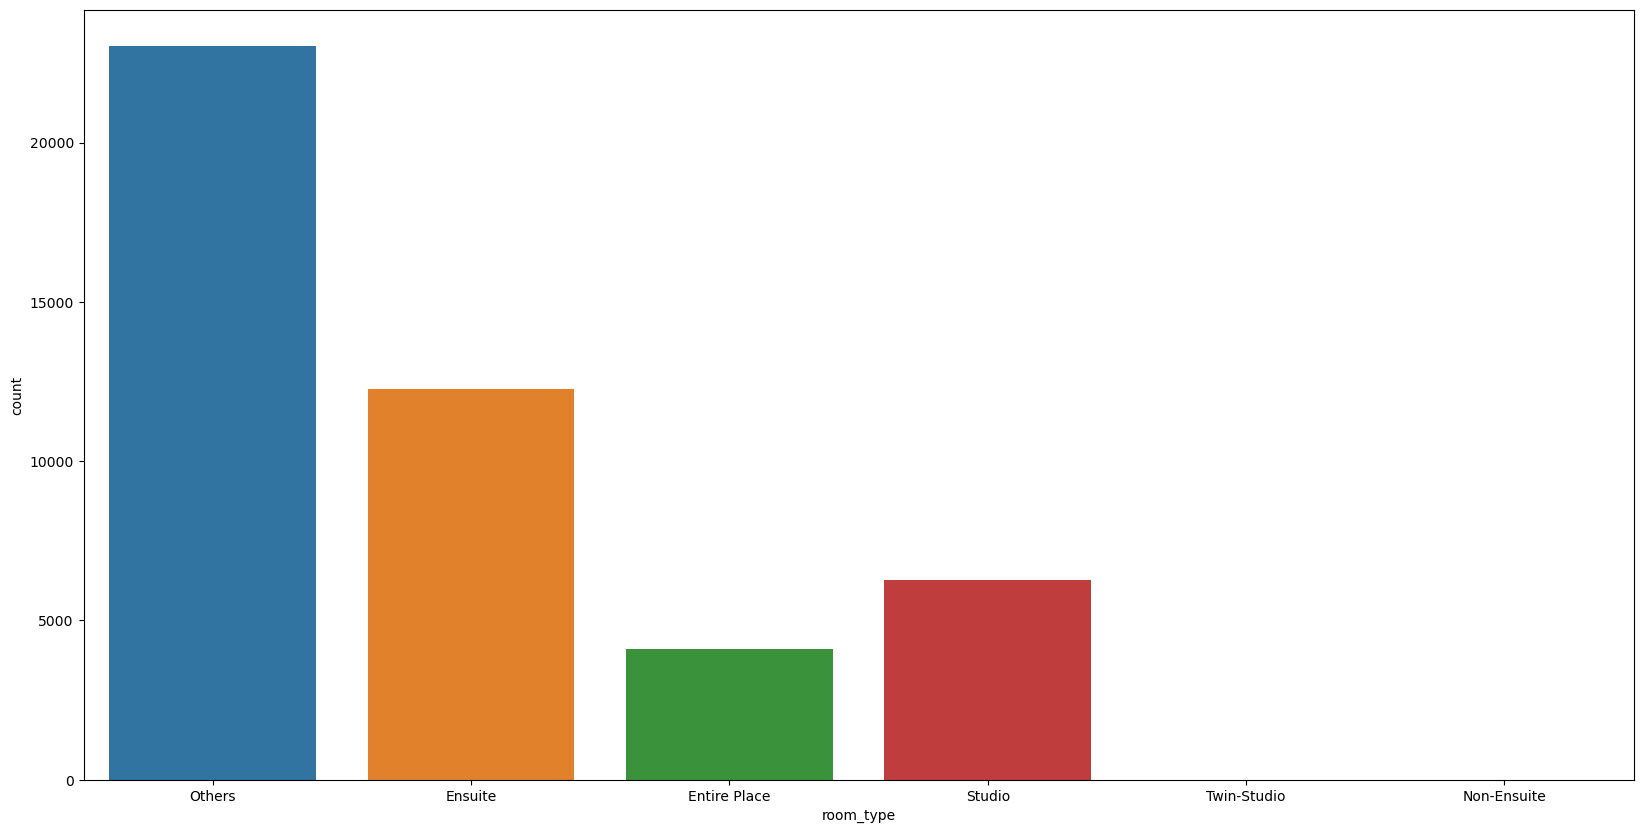

In [28]:
# visualizing "room_type" after correction

fig, ax = plt.subplots(figsize=(20, 10))
 

sns.countplot(data['room_type'],ax=ax)
plt.show()

2. Handling source_city


In [29]:
data["source_city"].describe()

count                                                 37001
unique                                                 4274
top       ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
freq                                                   2990
Name: source_city, dtype: object

In [30]:
data["source_city"].isna().sum()

8656

In [31]:
# replacing source_city missing values with mode

data['source_city'] = data['source_city'].replace(np.NaN, 'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7')

In [32]:
data["source_city"].describe()

count                                                 45657
unique                                                 4274
top       ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
freq                                                  11646
Name: source_city, dtype: object

3. Handling source_country

In [33]:
data["source_country"].describe()

count                                                 37203
unique                                                  183
top       e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...
freq                                                  18451
Name: source_country, dtype: object

In [34]:
data["source_country"].isna().sum()

8454

In [35]:
# replacing source_country missing values with mode

data['source_country'] = data['source_country'].replace(np.NaN, 'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96')


In [36]:
data["source_country"].describe()

count                                                 45657
unique                                                  183
top       e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...
freq                                                  26905
Name: source_country, dtype: object

4. Handling des_city


In [37]:
data["des_city"].describe()

count                                                 43196
unique                                                  216
top       ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
freq                                                   7291
Name: des_city, dtype: object

In [38]:
data["des_city"].isna().sum()

2461

In [39]:
# replacing des_city missing values with mode

data['des_city'] = data['des_city'].replace(np.NaN, 'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7')


In [40]:
data["des_city"].describe()

count                                                 45657
unique                                                  216
top       ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
freq                                                   9752
Name: des_city, dtype: object

5. Handling des_country

In [41]:
data["des_country"].describe()

count                                                 43196
unique                                                   14
top       8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
freq                                                  41867
Name: des_country, dtype: object

In [42]:
data["des_country"].isna().sum()

2461

In [43]:
# replacing des_country missing values with mode

data['des_country'] = data['des_country'].replace(np.NaN, '8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19')


In [44]:
data["des_country"].isna().sum()

0

In [45]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Agent_id           0.00
status             0.00
lost_reason        6.70
budget             7.87
lease              5.01
movein            29.08
source            12.67
source_city        0.00
source_country     0.00
utm_source         0.13
utm_medium         6.87
des_city           0.00
des_country        0.00
room_type          0.00
lead_id            0.00
dtype: float64

6. Handling source 

In [46]:
data["source"].describe()

count                                                 39873
unique                                                  677
top       7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...
freq                                                  19000
Name: source, dtype: object

In [47]:
data["source"].isna().sum()

5784

In [48]:
# replacing "source" missing values with mode

data["source"] = data["source"].replace(np.NaN, '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8')


In [49]:
data["source"].isna().sum()

0

Handling lost_reason        6.70

In [50]:
data["lost_reason"].describe()

count                42596
unique                  30
top       Low availability
freq                  8419
Name: lost_reason, dtype: object

In [51]:
data["lost_reason"].isna().sum()

3061

In [52]:
# replacing "lost_reason" missing values with mode

data["lost_reason"] = data["lost_reason"].replace(np.NaN, 'Low availability')


In [53]:
data["lost_reason"].isna().sum()

0

Handling budget 7.87

In [54]:
data["budget"].describe()

count                   42065
unique                   1839
top       £60 - £120 Per week
freq                     9676
Name: budget, dtype: object

In [55]:
data["budget"].isna().sum()

3592

In [56]:
# replacing "budget" missing values with mode range

data["budget"] = data["budget"].replace(np.NaN, '£60 - £120 Per week')


In [57]:
data["budget"].isna().sum()

0

Handling lease              5.01

In [58]:
data["lease"].describe()

count                                   43371
unique                                    309
top       Full Year Course Stay 40 - 44 weeks
freq                                    10904
Name: lease, dtype: object

In [59]:
# replacing "lease" missing values with mode

data["lease"] = data["lease"].replace(np.NaN, 'Full Year Course Stay 40 - 44 weeks')


In [60]:
data["lease"].isna().sum()

0

Handling utm_medium         6.87

In [61]:
data["utm_medium"].describe()

count                                                 42522
unique                                                   62
top       09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...
freq                                                  31158
Name: utm_medium, dtype: object

In [62]:
# replacing "utm_medium" missing values with mode

data["utm_medium"] = data["utm_medium"].replace(np.NaN, '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c')

In [63]:
data["utm_medium"].isna().sum()

0

In [64]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Agent_id           0.00
status             0.00
lost_reason        0.00
budget             0.00
lease              0.00
movein            29.08
source             0.00
source_city        0.00
source_country     0.00
utm_source         0.13
utm_medium         0.00
des_city           0.00
des_country        0.00
room_type          0.00
lead_id            0.00
dtype: float64

Handling movein

In [65]:
data["movein"].describe()

count        32381
unique         468
top       10/09/22
freq          2423
Name: movein, dtype: object

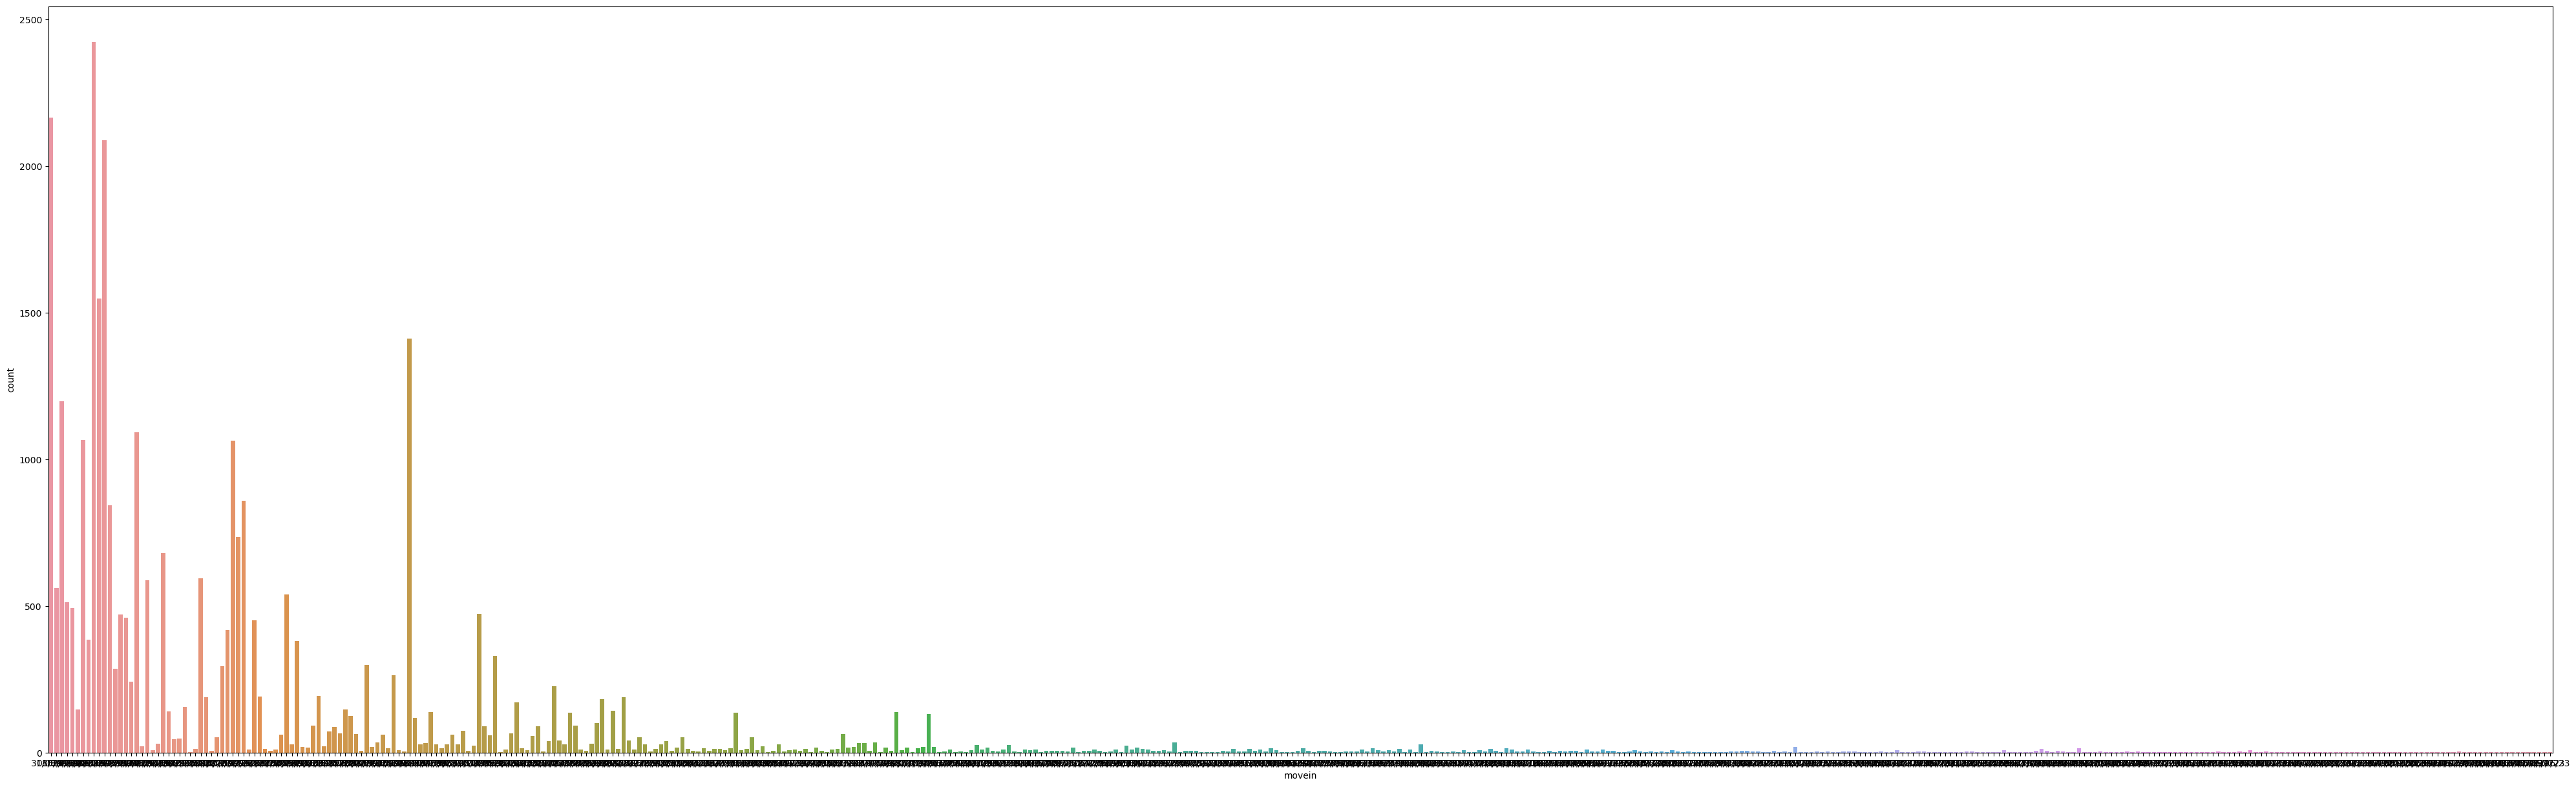

In [66]:
# visualizing movein
fig, ax = plt.subplots(figsize=(50, 15))
 

sns.countplot(data['movein'],ax=ax)
plt.show()

from excel , 
newest date - 04/09/24
oldest date - 01/01/70


In [67]:
data["movein"].value_counts()

10/09/22    2423
31/08/22    2164
01/09/22    2088
09/09/22    1547
17/09/22    1412
            ... 
30/05/23       1
07/06/02       1
26/04/23       1
10/06/23       1
06/06/23       1
Name: movein, Length: 468, dtype: int64

In [68]:
# selecting range 10/09/22  to 31/08/22 

In [69]:
# generating random date for given date range

import pandas as pd
import random
from datetime import date, timedelta

def random_date(start, end, seed=1):
    dates = pd.date_range(start, end).to_series()
    return random.choice(dates)

output = random_date("20220831", "20220910", seed=1)
print(output.strftime("%d/%m/%Y"))

06/09/2022


In [70]:
# generating random dates for NaN values in data['movein'] , 
# replacing NaN values as string "null" to detection
data['movein'] = data['movein'].replace(np.NaN, 'null')

new=[]
for i in data['movein']:
    
    if i == "null" :
       output = random_date("20220831", "20220910", seed=1)
       x=output.strftime("%d/%m/%Y")
       new.append(x)
    else:  
       new.append(i)
       
print(new)  


['05/09/2022', '08/09/2022', '31/08/22', '05/09/2022', '10/09/2022', '05/09/2022', '31/08/2022', '08/09/22', '04/09/2022', '01/09/2022', '10/09/2022', '15/09/22', '02/09/22', '04/09/22', '02/09/2022', '05/09/2022', '07/09/2022', '31/08/22', '09/08/22', '02/09/2022', '31/08/22', '03/09/2022', '03/09/2022', '15/09/22', '16/09/22', '10/09/2022', '30/08/22', '01/09/2022', '04/09/2022', '05/09/2022', '10/09/22', '15/09/22', '01/09/2022', '09/09/2022', '01/09/2022', '03/09/2022', '05/09/2022', '08/09/2022', '30/08/22', '09/09/22', '10/09/2022', '10/09/2022', '05/09/2022', '31/08/2022', '10/09/22', '10/09/22', '10/09/22', '01/09/2022', '07/09/2022', '10/09/2022', '01/09/22', '05/09/2022', '07/09/2022', '08/09/2022', '31/08/22', '18/09/22', '10/09/2022', '09/09/2022', '06/09/2022', '06/09/2022', '04/09/2022', '06/09/22', '03/09/2022', '02/09/22', '08/09/2022', '30/09/22', '07/09/2022', '25/09/22', '01/09/2022', '04/09/2022', '31/08/22', '05/09/2022', '09/09/22', '29/09/22', '14/09/22', '14/09/

In [71]:
# replacing existing movein data with generated values in the new()

data["movein"] = new

In [72]:
data["movein"].isna().sum()

0

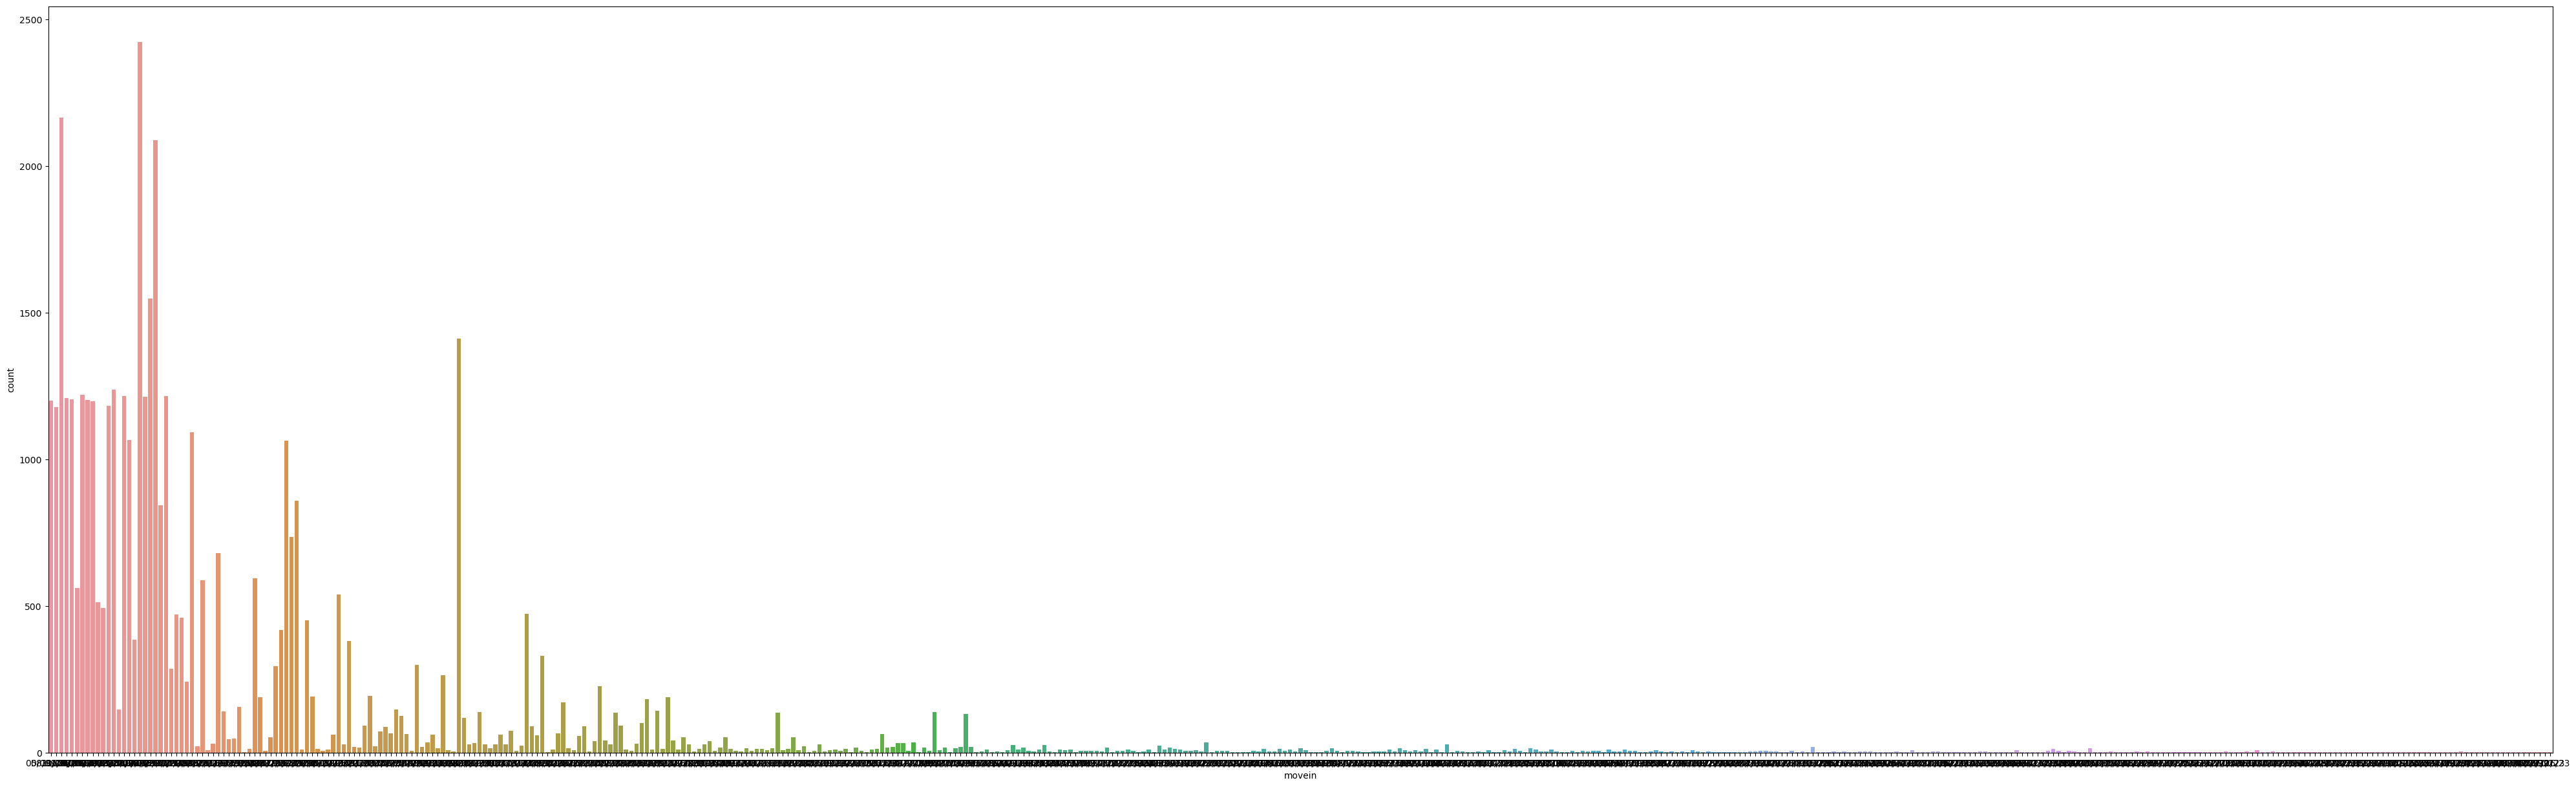

In [73]:
# visualizing movein after handling missing values
fig, ax = plt.subplots(figsize=(50, 15))
 

sns.countplot(data['movein'],ax=ax)
plt.show()

In [74]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Agent_id          0.00
status            0.00
lost_reason       0.00
budget            0.00
lease             0.00
movein            0.00
source            0.00
source_city       0.00
source_country    0.00
utm_source        0.13
utm_medium        0.00
des_city          0.00
des_country       0.00
room_type         0.00
lead_id           0.00
dtype: float64

In [75]:
# for utm_source 0.13% missing values - As a rule of thumb, if less than 5% of the observations are missing, 
# the missing data can simply be deleted without any significant ramifications 

data.dropna(inplace = True)
round(100*(data.isnull().sum()/len(data.index)), 2)

Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
des_country       0.0
room_type         0.0
lead_id           0.0
dtype: float64

In [76]:
# final data set size
data.shape

(45597, 15)

 Exploratory Analysis - for visualizing status variable("status" indicates whether a lead approches WON or LOST )

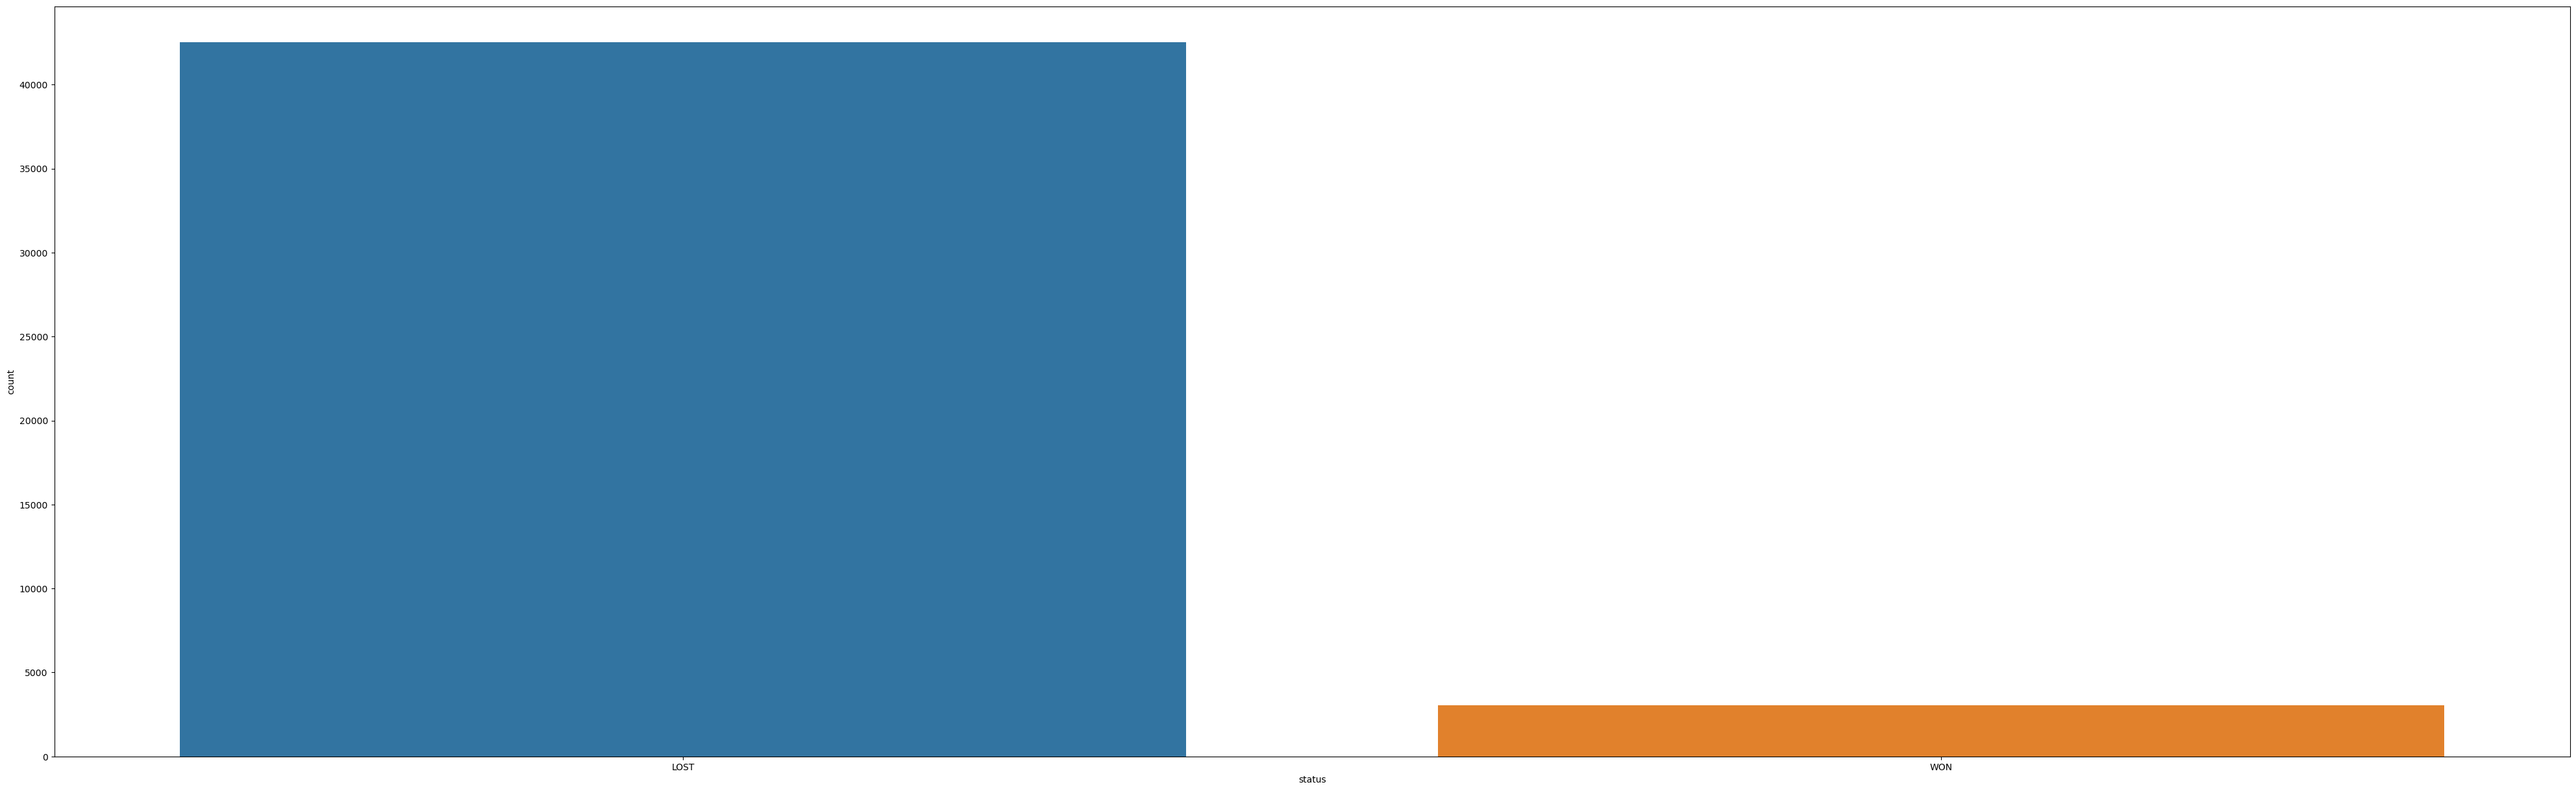

In [77]:
# visualizing "status" 
fig, ax = plt.subplots(figsize=(50, 15))
 

sns.countplot(data['status'],ax=ax)
plt.show()

Creating dummy variables for categorial variable set

In [78]:
# Creating a dummy variable for categorical variables(independent variables) except "agent_id", "lead_id"(ids are unique vaiables) and "status"(status is the dependent variable) 

dummy= pd.get_dummies(data[['lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city','des_country','room_type']])
dummy.head()

,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,budget_0-,budget_0-$100,budget_0-$100 to $150 per week,budget_0-$100/week,budget_0-$20,budget_0-$250,budget_0-$400-500CAD,budget_0-$50,budget_0-$60 to $120,budget_0-$800,budget_0-0,budget_0-1,budget_0-1 lakh,budget_0-10,budget_0-10 lakhs,"budget_0-10,000 GBP PA",budget_0-100,budget_0-100 / 110 per week including all bills,budget_0-100 Euors,budget_0-100 Pounds,...,des_city_d42cbc9b98e696c84021832bb70307dd977776fc7eeaf1e323ce8c253a14a63a,des_city_d7cb811928ff389561b798c8d0882a9b974e279b14c493ead62ff8407a83438b,des_city_d882350bb60d500d38838b1198c2b3efc4d6e6a07aa3a64f923623ac339e0fd1,des_city_d96d14f5564eeb355178395b04cdb970c3dc8d01f54d1b7adf0288820457899c,des_city_dad114b6ed7342bac65c79575f6c7ff761ec26b52c1f5f7a9110532973d05df2,des_city_dffc5bb23bbf0e21f0dc08cadbc76cfe1ab8c5efe88f2377ba1906113a973c33,des_city_e016cccaca26467a2edc017658536f41ae5046ba943b6963cb01e640c2ada6a2,des_city_e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b,des_city_e452f0a3e6f3ab1c0a954908bb8a8866372fa4931a89deca50cbd103fc42e197,des_city_e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca836532c458ff60f606af025,des_city_e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,des_city_e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970,des_city_ea58dc05b968545d016953b84130933e920097afbf34431e837395905d39e0f8,des_city_ec3ae6550b9446364138461d6a682d09d101ac1a5ed8a9298e0a50869fd832f7,des_city_ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314,des_city_ecbd30f15c1f6ff0c031d33f1b65f06366194b590fbf0f955acca9caa08dcfae,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_city_ed7d5c58c916fa0799b0d609ed79a45e3b312549c951fcd0992f93891221f816,des_city_ef348bd17202c36d669d4bce1806ddaa5e33366880fc9865218048c62a2f87c4,des_city_ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3,des_city_f0f7d0f1dfaf96d3015a979080a4f8a1b7683a5b890c0e3ba456e16efadb5783,des_city_f19d051291d4364989e4e957ef610448af3e05863ee1b812738dd8ba78704bbf,des_city_f3966925d3b328c7fda7ebf6bc87747f2f15040ae6c16502a76d02e57003eb10,des_city_f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736,des_city_f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f,des_city_f618d9049cbfb9410ad8d47541218cc7a2a9e930750f593cbf5e1f68c3f27359,des_city_f85b65964d0cd041e8113f3b493abe0247f7f6d2b80762db183c09b1eae7e4f8,des_city_f92fd06da205d4b09f2683869528060f182275110babcbf20acd1c01c875e3c0,des_city_f9bfb92c288658941063ed2dfc7feca398a9df1623a428f5790d9818dc91297f,des_city_fb5c9d2cf0b916ef699ed346ada794721b2c9f5b20bcbd9b4fc556423c538677,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a,des_country_3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7,des_country_49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,des_country_4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,des_country_5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab

In [79]:
# combining cleaned dataframe with dummy varable table
data = pd.concat([data, dummy], axis=1)
data.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,budget_0-,budget_0-$100,budget_0-$100 to $150 per week,budget_0-$100/week,budget_0-$20,...,des_city_d42cbc9b98e696c84021832bb70307dd977776fc7eeaf1e323ce8c253a14a63a,des_city_d7cb811928ff389561b798c8d0882a9b974e279b14c493ead62ff8407a83438b,des_city_d882350bb60d500d38838b1198c2b3efc4d6e6a07aa3a64f923623ac339e0fd1,des_city_d96d14f5564eeb355178395b04cdb970c3dc8d01f54d1b7adf0288820457899c,des_city_dad114b6ed7342bac65c79575f6c7ff761ec26b52c1f5f7a9110532973d05df2,des_city_dffc5bb23bbf0e21f0dc08cadbc76cfe1ab8c5efe88f2377ba1906113a973c33,des_city_e016cccaca26467a2edc017658536f41ae5046ba943b6963cb01e640c2ada6a2,des_city_e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b,des_city_e452f0a3e6f3ab1c0a954908bb8a8866372fa4931a89deca50cbd103fc42e197,des_city_e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca836532c458ff60f606af025,des_city_e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,des_city_e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970,des_city_ea58dc05b968545d016953b84130933e920097afbf34431e837395905d39e0f8,des_city_ec3ae6550b9446364138461d6a682d09d101ac1a5ed8a9298e0a50869fd832f7,des_city_ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314,des_city_ecbd30f15c1f6ff0c031d33f1b65f06366194b590fbf0f955acca9caa08dcfae,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_city_ed7d5c58c916fa0799b0d609ed79a45e3b312549c951fcd0992f93891221f816,des_city_ef348bd17202c36d669d4bce1806ddaa5e33366880fc9865218048c62a2f87c4,des_city_ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3,des_city_f0f7d0f1dfaf96d3015a979080a4f8a1b7683a5b890c0e3ba456e16efadb5783,des_city_f19d051291d4364989e4e957ef610448af3e05863ee1b812738dd8ba78704bbf,des_city_f3966925d3b328c7fda7ebf6bc87747f2f15040ae6c16502a76d02e57003eb10,des_city_f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736,des_city_f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f,des_city_f618d9049cbfb9410ad8d47541218cc7a2a9e930750f593cbf5e1f68c3f27359,des_city_f85b65964d0cd041e8113f3b493abe0247f7f6d2b80762db183c09b1eae7e4f8,des_city_f92fd06da205d4b09f2683869528060f182275110babcbf20acd1c01c875e3c0,des_city_f9bfb92c288658941063ed2dfc7feca398a9df1623a428f5790d9818dc91297f,des_city_fb5c9d2cf0b916ef699ed346ada794721b2c9f5b20bcbd9b4fc556423c538677,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a,des_country_3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7,des_country_49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,des_country_4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,des_country_5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153,des_country_80db4ccdca106d37b920206331fcfe3e9e50a9e763d89b54ce3ad5ac8cf30f03,des_country_8d23a6e37e0a6431a8f1b43a

In [80]:
# removing independent categorical variables from combined dataframe
data = data.drop(['lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city','des_country','room_type'], axis = 1)
data.head()


,Agent_id,status,lead_id,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,budget_0-,budget_0-$100,budget_0-$100 to $150 per week,budget_0-$100/week,budget_0-$20,budget_0-$250,budget_0-$400-500CAD,budget_0-$50,budget_0-$60 to $120,budget_0-$800,budget_0-0,budget_0-1,budget_0-1 lakh,budget_0-10,budget_0-10 lakhs,"budget_0-10,000 GBP PA",budget_0-100,...,des_city_d42cbc9b98e696c84021832bb70307dd977776fc7eeaf1e323ce8c253a14a63a,des_city_d7cb811928ff389561b798c8d0882a9b974e279b14c493ead62ff8407a83438b,des_city_d882350bb60d500d38838b1198c2b3efc4d6e6a07aa3a64f923623ac339e0fd1,des_city_d96d14f5564eeb355178395b04cdb970c3dc8d01f54d1b7adf0288820457899c,des_city_dad114b6ed7342bac65c79575f6c7ff761ec26b52c1f5f7a9110532973d05df2,des_city_dffc5bb23bbf0e21f0dc08cadbc76cfe1ab8c5efe88f2377ba1906113a973c33,des_city_e016cccaca26467a2edc017658536f41ae5046ba943b6963cb01e640c2ada6a2,des_city_e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b,des_city_e452f0a3e6f3ab1c0a954908bb8a8866372fa4931a89deca50cbd103fc42e197,des_city_e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca836532c458ff60f606af025,des_city_e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,des_city_e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970,des_city_ea58dc05b968545d016953b84130933e920097afbf34431e837395905d39e0f8,des_city_ec3ae6550b9446364138461d6a682d09d101ac1a5ed8a9298e0a50869fd832f7,des_city_ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314,des_city_ecbd30f15c1f6ff0c031d33f1b65f06366194b590fbf0f955acca9caa08dcfae,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_city_ed7d5c58c916fa0799b0d609ed79a45e3b312549c951fcd0992f93891221f816,des_city_ef348bd17202c36d669d4bce1806ddaa5e33366880fc9865218048c62a2f87c4,des_city_ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3,des_city_f0f7d0f1dfaf96d3015a979080a4f8a1b7683a5b890c0e3ba456e16efadb5783,des_city_f19d051291d4364989e4e957ef610448af3e05863ee1b812738dd8ba78704bbf,des_city_f3966925d3b328c7fda7ebf6bc87747f2f15040ae6c16502a76d02e57003eb10,des_city_f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736,des_city_f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f,des_city_f618d9049cbfb9410ad8d47541218cc7a2a9e930750f593cbf5e1f68c3f27359,des_city_f85b65964d0cd041e8113f3b493abe0247f7f6d2b80762db183c09b1eae7e4f8,des_city_f92fd06da205d4b09f2683869528060f182275110babcbf20acd1c01c875e3c0,des_city_f9bfb92c288658941063ed2dfc7feca398a9df1623a428f5790d9818dc91297f,des_city_fb5c9d2cf0b916ef699ed346ada794721b2c9f5b20bcbd9b4fc556423c538677,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a,des_country_3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7,des_country_49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,des_country_4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,des_country_5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153,des_country_80db4ccdca106d37b920206331fcfe3

In [81]:
# feature selection--defining X dataframe to train purpose(including only dummy variable set)

X = data.drop(['Agent_id','lead_id','status'], axis=1)
X.head()

,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,budget_0-,budget_0-$100,budget_0-$100 to $150 per week,budget_0-$100/week,budget_0-$20,budget_0-$250,budget_0-$400-500CAD,budget_0-$50,budget_0-$60 to $120,budget_0-$800,budget_0-0,budget_0-1,budget_0-1 lakh,budget_0-10,budget_0-10 lakhs,"budget_0-10,000 GBP PA",budget_0-100,budget_0-100 / 110 per week including all bills,budget_0-100 Euors,budget_0-100 Pounds,...,des_city_d42cbc9b98e696c84021832bb70307dd977776fc7eeaf1e323ce8c253a14a63a,des_city_d7cb811928ff389561b798c8d0882a9b974e279b14c493ead62ff8407a83438b,des_city_d882350bb60d500d38838b1198c2b3efc4d6e6a07aa3a64f923623ac339e0fd1,des_city_d96d14f5564eeb355178395b04cdb970c3dc8d01f54d1b7adf0288820457899c,des_city_dad114b6ed7342bac65c79575f6c7ff761ec26b52c1f5f7a9110532973d05df2,des_city_dffc5bb23bbf0e21f0dc08cadbc76cfe1ab8c5efe88f2377ba1906113a973c33,des_city_e016cccaca26467a2edc017658536f41ae5046ba943b6963cb01e640c2ada6a2,des_city_e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b,des_city_e452f0a3e6f3ab1c0a954908bb8a8866372fa4931a89deca50cbd103fc42e197,des_city_e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca836532c458ff60f606af025,des_city_e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,des_city_e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970,des_city_ea58dc05b968545d016953b84130933e920097afbf34431e837395905d39e0f8,des_city_ec3ae6550b9446364138461d6a682d09d101ac1a5ed8a9298e0a50869fd832f7,des_city_ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314,des_city_ecbd30f15c1f6ff0c031d33f1b65f06366194b590fbf0f955acca9caa08dcfae,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_city_ed7d5c58c916fa0799b0d609ed79a45e3b312549c951fcd0992f93891221f816,des_city_ef348bd17202c36d669d4bce1806ddaa5e33366880fc9865218048c62a2f87c4,des_city_ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3,des_city_f0f7d0f1dfaf96d3015a979080a4f8a1b7683a5b890c0e3ba456e16efadb5783,des_city_f19d051291d4364989e4e957ef610448af3e05863ee1b812738dd8ba78704bbf,des_city_f3966925d3b328c7fda7ebf6bc87747f2f15040ae6c16502a76d02e57003eb10,des_city_f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736,des_city_f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f,des_city_f618d9049cbfb9410ad8d47541218cc7a2a9e930750f593cbf5e1f68c3f27359,des_city_f85b65964d0cd041e8113f3b493abe0247f7f6d2b80762db183c09b1eae7e4f8,des_city_f92fd06da205d4b09f2683869528060f182275110babcbf20acd1c01c875e3c0,des_city_f9bfb92c288658941063ed2dfc7feca398a9df1623a428f5790d9818dc91297f,des_city_fb5c9d2cf0b916ef699ed346ada794721b2c9f5b20bcbd9b4fc556423c538677,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a,des_country_3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7,des_country_49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,des_country_4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,des_country_5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab

In [82]:
# feature selection--defining Y dataframe for train purpose
Y=data["status"]
Y.head()

0    LOST
1    LOST
2    LOST
3    LOST
4    LOST
Name: status, dtype: object

In [83]:
# Converting string values of "status" to numerical value

a=[]
for i in data["status"]:
    if i=="LOST":
        i=0
        a.append(i)
    else:
        i=1
        a.append(i)
        
data["status"]= a
#print(a)
print(data["status"])

0        0
1        0
2        0
3        0
4        0
        ..
46603    0
46604    0
46605    0
46606    0
46607    0
Name: status, Length: 45597, dtype: int64


In [85]:
# assigning numerical "status" to Y
Y= data['status']

# Training ( on 30 percent of data)  and Testing ( on 70 percent of data)

In [95]:
# Splitting X, Y data into train and test(defines X_train, X_test, Y_train, Y_test dataframes)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)


In [97]:
# Training the data using, random forest model(inputs-  X_train and Y_train dataframes)

from sklearn.ensemble import RandomForestClassifier




num_estimators = 100
min_samples = 4

rf = RandomForestClassifier(n_estimators=num_estimators,min_samples_split=min_samples)
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(min_samples_split=4)

In [98]:
# using rf()) function trained on X_train and Y_train data to the prediction 

# input X_test data to rf() to get prediction data set, Y_test_predicted
Y_test_predicted = rf.predict(X_test)
    


# 4.Evaluating performance using metrics (accuracy, precision, recall and F1-score)

In [99]:
from sklearn import metrics

# accuracy check for Y predicted data vs actual Y test data
accuracy = metrics.accuracy_score(Y_test, Y_test_predicted)

# ROC AUC score check for Y predicted data vs actual Y test data
# (auc score ranges between 0 and 1, aucscore of 0.5-random guess, 1-perfect classifier)
auc_score = metrics.roc_auc_score(Y_test, Y_test_predicted)

# output accuracy and auc_score
print(accuracy)
print(auc_score)

0.9664473684210526
0.7617693283591266


In [100]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# accuracy check
print('Accuracy:', accuracy_score(Y_test, Y_test_predicted))

# precision check
print('Precision:', precision_score(Y_test, Y_test_predicted))

# recall check(0-1)
# 1-all positive samples correctly predicted as positive, 0-no positive samples predicted as positive.
print('Recall:', recall_score(Y_test, Y_test_predicted))

# F1 score check(0-1)
# 1-perfect precision and recall,0-either precision or recall is 0.
print('F1 score:', f1_score(Y_test, Y_test_predicted))




Accuracy: 0.9664473684210526
Precision: 0.932806324110672
Recall: 0.5261984392419174
F1 score: 0.6728439059158945


In [101]:
# classification report and confussion matrix output
print('\n clasification report:\n', classification_report(Y_test,Y_test_predicted))
print('\n confussion matrix:\n',confusion_matrix(Y_test,Y_test_predicted))


 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     12783
           1       0.93      0.53      0.67       897

    accuracy                           0.97     13680
   macro avg       0.95      0.76      0.83     13680
weighted avg       0.97      0.97      0.96     13680


 confussion matrix:
 [[12749    34]
 [  425   472]]
